# Import and Preview Dataset

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/twitter-suicidal-data/twitter-suicidal_data.csv')

# Show head & tail
display(df.head())
display(df.tail())

print("Shape:", df.shape)


,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


,tweet,intention
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1
9118,when cancer takes a life we blame cancer depre...,1


Shape: (9119, 2)


# Data Cleaning and Class Distribution 

Null values:
 tweet        0
intention    0
dtype: int64
Class counts:
 0    5121
1    3998
Name: intention, dtype: int64


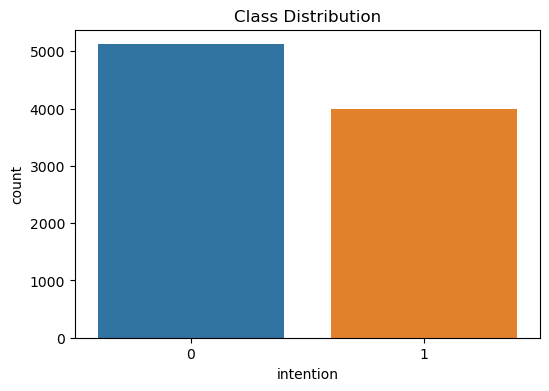

,tweet,intention
3596,still have never done a brick tour,0
6083,shattered sway sway in melbourne sold out im g...,0
8009,i want to die but in like a festive way,0
3813,oh jesus i need some starbucks in my life rig...,0
8294,i hate reveluvs i hate them so much when i see...,0


In [7]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning functions
def _remove_special_chars(x):
    return re.sub(r'[^\w ]+', "", x)

def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

df['tweet'] = df['tweet'].apply(_remove_special_chars)
df['tweet'] = df['tweet'].apply(_remove_emails)

print("Null values:\n", df.isnull().sum())
print("Class counts:\n", df['intention'].value_counts())

# Distribution graph
plt.figure(figsize=(6,4))
sns.countplot(x=df['intention'])
plt.title("Class Distribution")
plt.savefig("/kaggle/working/class_distribution.png")  # Save as PNG
plt.show()

display(df.sample(5))


# Feature Extraction and Train-Test Split 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorizer
Tf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = Tf.fit_transform(df['tweet'])
y = df['intention']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)


Train shape: (7295, 5000) Test shape: (1824, 5000)


# Model Training, Evaluation, and Comparison 

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1060
           1       0.93      0.84      0.88       764

    accuracy                           0.91      1824
   macro avg       0.91      0.90      0.90      1824
weighted avg       0.91      0.91      0.91      1824



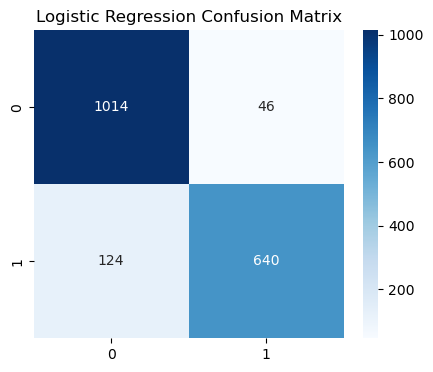

===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1060
           1       0.85      0.89      0.87       764

    accuracy                           0.89      1824
   macro avg       0.89      0.89      0.89      1824
weighted avg       0.89      0.89      0.89      1824



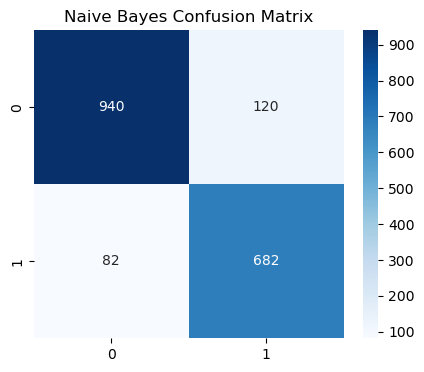

===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1060
           1       0.90      0.81      0.85       764

    accuracy                           0.88      1824
   macro avg       0.88      0.87      0.88      1824
weighted avg       0.88      0.88      0.88      1824



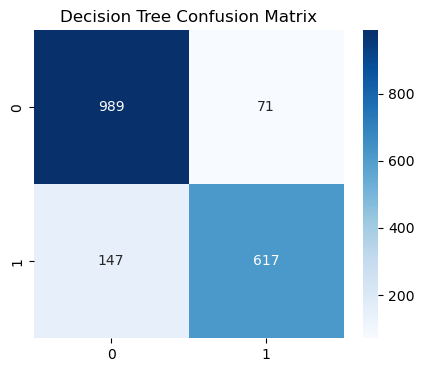

===== LinearSVC =====
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1060
           1       0.92      0.89      0.91       764

    accuracy                           0.92      1824
   macro avg       0.92      0.92      0.92      1824
weighted avg       0.92      0.92      0.92      1824



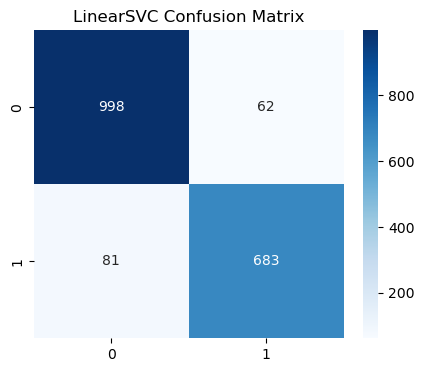

<Figure size 1000x600 with 0 Axes>

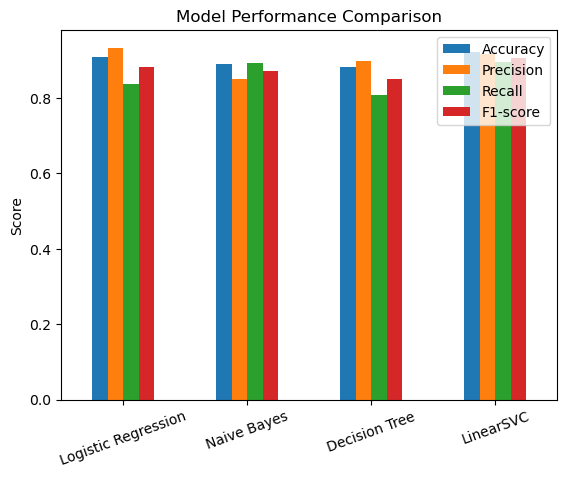

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.906798,0.932945,0.837696,0.882759
Naive Bayes,0.889254,0.850374,0.892670,0.871009
Decision Tree,0.880482,0.896802,0.807592,0.849862
LinearSVC,0.921601,0.916779,0.893979,0.905235


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=0),
    "LinearSVC": LinearSVC()
}

results = {}

for name, model in models.items():
    print(f"===== {name} =====")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = [acc, prec, rec, f1]

    # Report
    print(classification_report(y_test, y_pred))

    # Heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"/kaggle/working/{name.replace(' ', '_')}_confusion_matrix.png")  # Save PNG
    plt.show()

# Compare metrics
results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-score"]).T

plt.figure(figsize=(10,6))
results_df.plot(kind='bar')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.savefig("/kaggle/working/model_performance_comparison.png")  # Save PNG
plt.show()

display(results_df)


# Simple Output


In [10]:
# Example input tweets
tweets = [
    "I feel so hopeless and want to give up.",
    "I am having a great day, everything is awesome!"
]

# Loop through all trained models
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    for t in tweets:
        pred = int(model.predict(Tf.transform([t]))[0])
        print(t, "->", pred)
    print()


--- Logistic Regression ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0

--- Naive Bayes ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0

--- Decision Tree ---
I feel so hopeless and want to give up. -> 0
I am having a great day, everything is awesome! -> 0

--- LinearSVC ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0



# FULL PROJECT IN ONE CELL

Null values:
 tweet        0
intention    0
dtype: int64
Class counts:
 0    5121
1    3998
Name: intention, dtype: int64


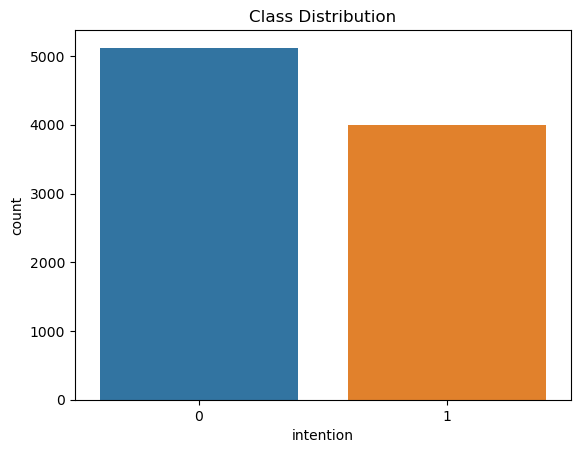

Train shape: (7295, 5000) Test shape: (1824, 5000)

===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1060
           1       0.93      0.84      0.88       764

    accuracy                           0.91      1824
   macro avg       0.91      0.90      0.90      1824
weighted avg       0.91      0.91      0.91      1824



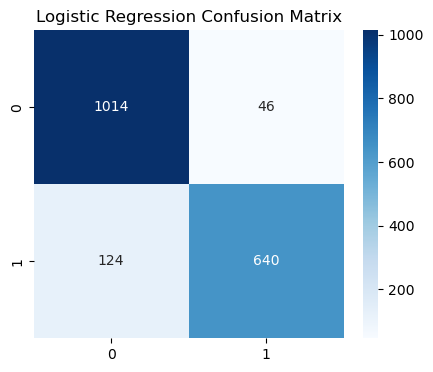


===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1060
           1       0.85      0.89      0.87       764

    accuracy                           0.89      1824
   macro avg       0.89      0.89      0.89      1824
weighted avg       0.89      0.89      0.89      1824



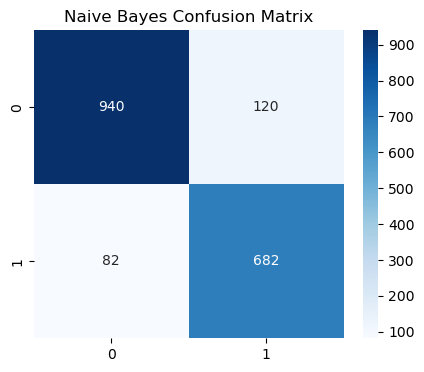


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1060
           1       0.90      0.81      0.85       764

    accuracy                           0.88      1824
   macro avg       0.88      0.87      0.88      1824
weighted avg       0.88      0.88      0.88      1824



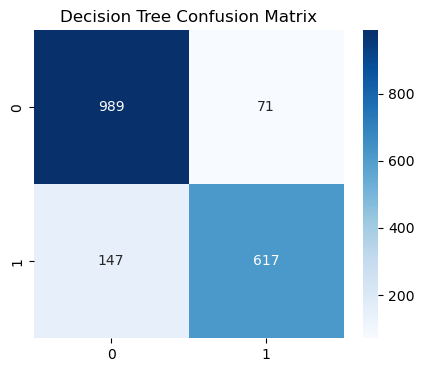


===== LinearSVC =====
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1060
           1       0.92      0.89      0.91       764

    accuracy                           0.92      1824
   macro avg       0.92      0.92      0.92      1824
weighted avg       0.92      0.92      0.92      1824



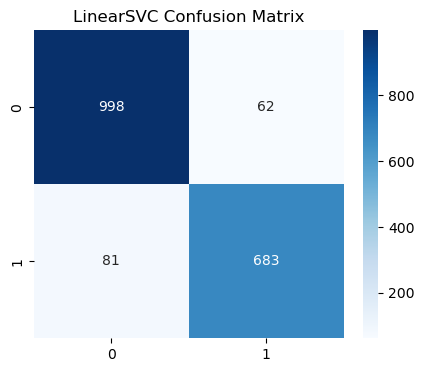

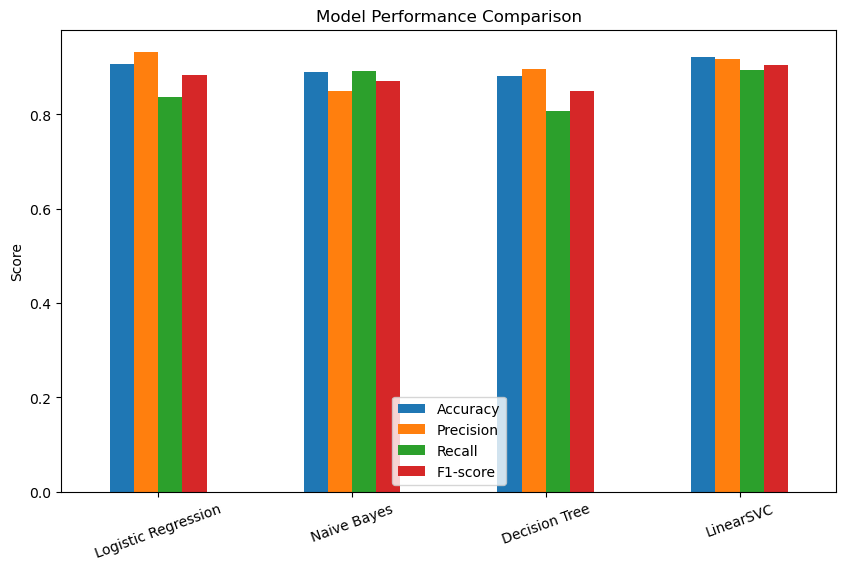

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.906798,0.932945,0.837696,0.882759
Naive Bayes,0.889254,0.850374,0.892670,0.871009
Decision Tree,0.880482,0.896802,0.807592,0.849862
LinearSVC,0.921601,0.916779,0.893979,0.905235



--- Logistic Regression ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0

--- Naive Bayes ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0

--- Decision Tree ---
I feel so hopeless and want to give up. -> 0
I am having a great day, everything is awesome! -> 0

--- LinearSVC ---
I feel so hopeless and want to give up. -> 1
I am having a great day, everything is awesome! -> 0


In [11]:
# ======================= FULL CODE (One Cell) ===========================
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load dataset
df= pd.read_csv('/kaggle/input/twitter-suicidal-data/twitter-suicidal_data.csv')

# 2. Cleaning functions
def _remove_special_chars(x):
    return re.sub(r'[^\w ]+', "", x)

def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

df['tweet']=df['tweet'].apply(_remove_special_chars)
df['tweet']=df['tweet'].apply(_remove_emails)

print("Null values:\n",df.isnull().sum())
print("Class counts:\n",df['intention'].value_counts())

# 3. Distribution graph
sns.countplot(x=df['intention'])
plt.title("Class Distribution")
plt.savefig("class_distribution.png")  # save to kaggle
plt.show()

# 4. Feature Extraction + Split
Tf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X=Tf.fit_transform(df['tweet'])
y=df['intention']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Train shape:",x_train.shape,"Test shape:",x_test.shape)

# 5. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=0),
    "LinearSVC": LinearSVC()
}

results = {}

for name,model in models.items():
    print(f"\n===== {name} =====")
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    results[name] = [acc,prec,rec,f1]

    print(classification_report(y_test,y_pred))

    # Heatmap save
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.savefig(f"{name.replace(' ','_')}_confusion_matrix.png")
    plt.show()

# 6. Compare metrics
results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-score"]).T
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.savefig("model_performance_comparison.png")
plt.show()

display(results_df)

# 7. Simple Demo Predictions for all 4 models
demo_texts = [
    "I feel so hopeless and want to give up.",  # suicidal
    "I am having a great day, everything is awesome!"  # normal
]
demo_X = Tf.transform(demo_texts)

for name,model in models.items():
    preds = model.predict(demo_X)
    print(f"\n--- {name} ---")
    for text, pred in zip(demo_texts, preds):
        print(f"{text} -> {pred}")
# ========================================================================
